# **Zomato Rating Prediction**

# **Objective**

The basic idea of analysing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving
dishes from all over the world. With each day new restaurants opening the industry hasn’t been saturated yet and the demand is increasing day by day. In spite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are
dependent mainly on the restaurant food as they don&#39;t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. <br>**Hence build a model to predict the rating of the each restaurants.<br><br>**


## Dataset description.


**url**: contains the url of the restaurant in the zomato website<br>
**address:** contains the address of the restaurant in Bengaluru<br>
**name:** contains the name of the restaurant<br>
**online_order:** whether online ordering is available in the restaurant or not<br>
**book_table**: table book option available or not<br>
**rate:** contains the overall rating of the restaurant out of 5<br>
**votes:** contains total number of rating for the restaurant as of the above-mentioned date<br>
**phone:** contains the phone number of the restaurant<br>
**location:** contains the neighborhood in which the restaurant is located<br>
**rest_type:** restaurant type<br>
**dish_liked:** dishes people liked in the restaurant<br>
**cuisines: **food styles, separated by comma<br>
**approx_cost(for two people)**: contains the approximate cost for meal for two people<br>
**reviews_list:** list of tuples containing reviews for the restaurant, each tuple consists of two
values, rating and review by the customer
**menu_item:** contains list of menus available in the restaurant<br>
**listed_in(type):** type of meal<br>
**listed_in(city):** contains the neighborhood in which the restaurant is listed<br>

## Importing required libraries.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Loading the data file.
df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Projects/Discover Dollar Projects/Assignment_2/zomato_train.xlsx')
df.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


## Data Preprocessing

In [6]:
df.shape # Returns the dimension of the data.

(41373, 17)

**Observations -** This data has 41,373 rows and 17 columns.

In [7]:
df.columns   # Get columns of a dataset.

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          41373 non-null  object
 1   address                      41373 non-null  object
 2   name                         41373 non-null  object
 3   online_order                 41373 non-null  object
 4   book_table                   41373 non-null  object
 5   votes                        41373 non-null  int64 
 6   phone                        40402 non-null  object
 7   location                     41358 non-null  object
 8   rest_type                    41198 non-null  object
 9   dish_liked                   18901 non-null  object
 10  cuisines                     41341 non-null  object
 11  approx_cost(for two people)  41094 non-null  object
 12  reviews_list                 41373 non-null  object
 13  menu_item                    41

**Observations- ** This dataset has 16 features of object type and only single feature is of integer type.


In [9]:
df.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [10]:
df.describe(include = ['object','bool'])

,url,address,name,online_order,book_table,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
count,41373,41373,41373,41373,41373,40402,41358,41198,18901,41341,41094,41373,41373,41373,41373,33392
unique,41373,11012,8487,2,2,12126,93,93,5026,2654,68,19556,7658,7,30,63
top,https://www.zomato.com/bangalore/sri-durga-gra...,Delivery Only,Cafe Coffee Day,Yes,No,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,3.9
freq,1,96,81,24330,36231,183,4077,15295,130,2348,6046,6045,31656,20778,2674,1687


### Checking for null Values

In [11]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

***Rename*** some columns names like approx_cost(for two people), listed_in(type), listed_in(city)

In [0]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
#df.head()

**Finding percentage of missing values of each columns.** 

In [0]:
def missing_percent():
  miss_phone = (df['phone'].isnull().sum()/len(df))*100
  miss_location = (df['location'].isnull().sum()/len(df))*100
  miss_rest_type = (df['rest_type'].isnull().sum()/len(df))*100
  miss_dish_liked = (df['dish_liked'].isnull().sum()/len(df))*100
  miss_cuisines = (df['cuisines'].isnull().sum()/len(df))*100
  miss_cost = (df['cost'].isnull().sum()/len(df))*100
  miss_rates = (df['rates'].isnull().sum()/len(df))*100

  print('miss_phone: ' + str(miss_phone))
  print('miss_location: ' +str(miss_location))
  print('miss_rest_type: ' +str(miss_rest_type))
  print('miss_dish_liked: ' +str(miss_dish_liked))
  print('miss_cuisnes: ' +str(miss_cuisines))
  print('miss_cost: ' +str(miss_cost))
  print('miss_rates: ' +str(miss_rates))
  

In [14]:
missing_percent()

miss_phone: 2.346941241872719
miss_location: 0.036255528968167645
miss_rest_type: 0.4229811712952892
miss_dish_liked: 54.31561646484422
miss_cuisnes: 0.07734512846542431
miss_cost: 0.6743528388079182
miss_rates: 19.29035844632973


**Observation**: More than 50% values of the dish_liked are missing.

**Note** - Online_order and the book_table columns are of categorical values so coverting them into numeric

In [15]:
df['online_order'] = df['online_order'].apply(lambda x: 1 if str(x)=='Yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if str(x)=='Yes' else 0)
print(df.online_order)
print(df.book_table)

0        1
1        0
2        0
3        0
4        1
        ..
41368    0
41369    1
41370    1
41371    0
41372    1
Name: online_order, Length: 41373, dtype: int64
0        0
1        1
2        0
3        0
4        0
        ..
41368    0
41369    0
41370    1
41371    0
41372    0
Name: book_table, Length: 41373, dtype: int64


**Remove comma from the cost column**

In [0]:
rem_comma = lambda x: int(x.replace(',' , '')) if type(x)== np.str and x != np.nan else 0
df['cost'] = df['cost'].apply(rem_comma)


**Converting the type of votes and cost.**

In [0]:
df['votes'] = df['votes'].astype(int)
df['cost'] = df['cost'].astype(float)

In [0]:
#mean = df['rates'].mean
#df['rates'].fillna(mean,inplace = True)
#df['rates'].isnull().sum()

#df['rates'] = df['rates'].replace(np.nan, df['rates'].mean)
#df['rates']
df['rates'] = df['rates'].replace('NEW',np.NaN)
df['rates'] = df['rates'].replace('-',np.NaN)

In [19]:
df['rates']

0        3.1 
1        4.6 
2        3.4 
3        4.3 
4        3.7 
         ... 
41368    3.8 
41369     NaN
41370    3.5 
41371    3.3 
41372     NaN
Name: rates, Length: 41373, dtype: object

**Drop the rows which contain null values**

In [0]:
df1 = df.copy()
df1.dropna(how ='any', inplace = True)

In [0]:
#df1.head()

In [22]:
df1.shape

(18427, 17)

**Delete the columns which are does effect the predicting rates.**

In [23]:
df1.drop(columns = ['url','phone','location','address'], axis = 1,inplace = True)
df1.head()

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,rates
1,The Boozy Griffin,0,1,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental",1800.0,"[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
3,Sriracha,0,0,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos",1500.0,"[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
7,Chez Nous - Novotel,0,1,125,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500.0,"[('Rated 5.0', 'RATED\n I will visit there la...",[],Dine-out,Sarjapur Road,3.9
9,Hyderabadi Biryani Hub,1,0,218,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600.0,"[('Rated 3.0', 'RATED\n My friend ordered fri...",[],Delivery,BTM,3.6
11,Foody's,1,0,169,Quick Bites,"Coffee, Paratha, Chaat, Masala Dosa, Dahipuri,...","North Indian, South Indian",250.0,"[('Rated 4.0', 'RATED\n Superb Coffee and Foo...",[],Delivery,Residency Road,3.8


In [24]:
df1.dtypes

name             object
online_order      int64
book_table        int64
votes             int64
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
rates            object
dtype: object

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18427 entries, 1 to 41368
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18427 non-null  object 
 1   online_order  18427 non-null  int64  
 2   book_table    18427 non-null  int64  
 3   votes         18427 non-null  int64  
 4   rest_type     18427 non-null  object 
 5   dish_liked    18427 non-null  object 
 6   cuisines      18427 non-null  object 
 7   cost          18427 non-null  float64
 8   reviews_list  18427 non-null  object 
 9   menu_item     18427 non-null  object 
 10  type          18427 non-null  object 
 11  city          18427 non-null  object 
 12  rates         18427 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [26]:
df1.describe()

,online_order,book_table,votes,cost
count,18427.000000,18427.000000,18427.000000,18427.000000
mean,0.705812,0.261627,605.684648,752.539209
std,0.455689,0.439532,1121.375611,522.157919
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,103.000000,400.000000
50%,1.000000,0.000000,225.000000,600.000000
75%,1.000000,1.000000,597.000000,1000.000000
max,1.000000,1.000000,16832.000000,6000.000000


In [27]:
df1.head()

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,rates
1,The Boozy Griffin,0,1,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental",1800.0,"[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
3,Sriracha,0,0,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos",1500.0,"[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
7,Chez Nous - Novotel,0,1,125,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500.0,"[('Rated 5.0', 'RATED\n I will visit there la...",[],Dine-out,Sarjapur Road,3.9
9,Hyderabadi Biryani Hub,1,0,218,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600.0,"[('Rated 3.0', 'RATED\n My friend ordered fri...",[],Delivery,BTM,3.6
11,Foody's,1,0,169,Quick Bites,"Coffee, Paratha, Chaat, Masala Dosa, Dahipuri,...","North Indian, South Indian",250.0,"[('Rated 4.0', 'RATED\n Superb Coffee and Foo...",[],Delivery,Residency Road,3.8


## **Data Visualization**

### **Univariate Analysis**

**1. Total number of restaurants which takes online orders.**

In [28]:
df1['online_order'].value_counts()

1    13006
0     5421
Name: online_order, dtype: int64

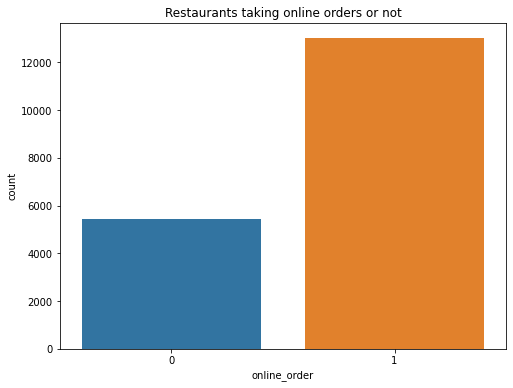

In [29]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='online_order' , data = df1)
plt.title('Restaurants taking online orders or not')
plt.show()

**Observations-** 13,001 restaurants are taking online orders while 5,451 restaurants are not taking online orders out of 18,427 restaurants

**2. Restaurants allowing table booking or not.**

In [30]:
df1['book_table'].value_counts()

0    13606
1     4821
Name: book_table, dtype: int64

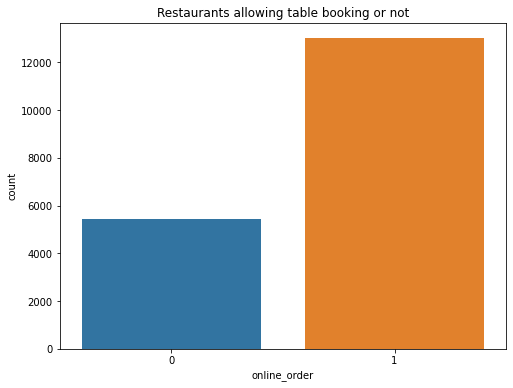

In [31]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='online_order' , data = df1)
plt.title('Restaurants allowing table booking or not')
plt.show()

**Observations-** 13,606 restaurants are allows table booking while 4,821 restaurants doest not allow table booking  out of 18,427 restaurants.

**3. Total number of restaurant types in Bangalore.**

In [32]:
df1['rest_type'].value_counts()

Casual Dining                5885
Quick Bites                  4180
Cafe                         1840
Dessert Parlor                852
Casual Dining, Bar            768
                             ... 
Fine Dining, Microbrewery       4
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Food Court, Casual Dining       1
Dhaba                           1
Name: rest_type, Length: 73, dtype: int64

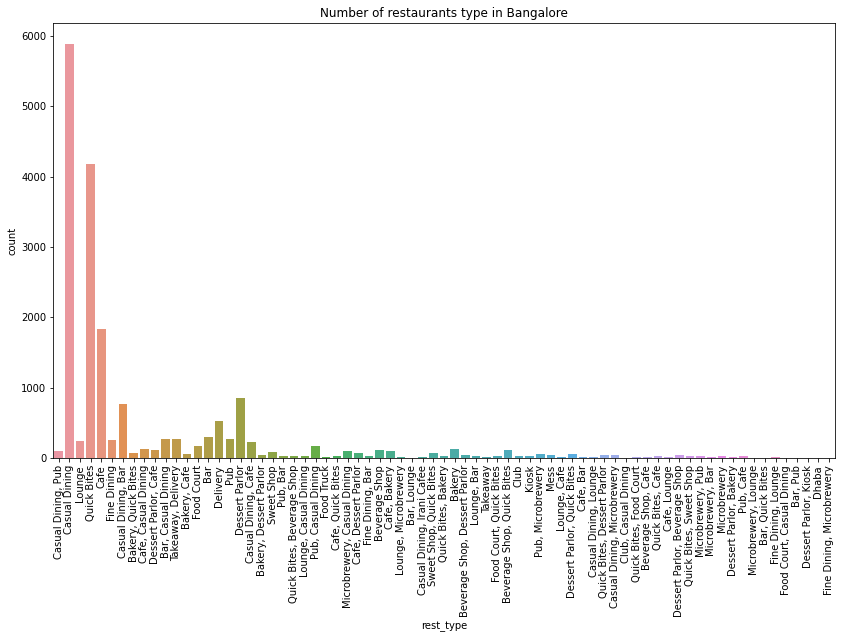

In [33]:
plt.figure(figsize=(14,8))
sns.countplot(x='rest_type' , data = df1)
plt.title('Number of restaurants type in Bangalore')

x = plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(90)
plt.show()

**Observations-** Casual Dining and Quick Bites type of restaurant are large in numbers as compared to other types of restaurants. 

**4. Dish liked by customers**

In [34]:
df1['dish_liked'].value_counts()

Biryani                                                                                            127
Friendly Staff                                                                                      55
Waffles                                                                                             50
Masala Dosa                                                                                         44
Chicken Biryani                                                                                     44
                                                                                                  ... 
Chicken Wrap, Veggie Wrap, Aloo Paratha, Rolls, Sabudana Kheer, Khichda, Roti                        1
Dal Makhani, Kulcha, Butter Chicken, Makke Ki Roti, Garlic Naan, Tandoori Chicken, Palak Paneer      1
Wine, Manchow Soup, Sangria, Salsa, Mocktails, Pasta, Nachos                                         1
Wine, Dumplings, Set Menu, Chicken Dim Sum, Tom Kha Soup, Fish, Sunday Br

In [0]:
#plt.figure(figsize=(20,8))
#sns.countplot(x='dish_liked' , data = df1)
#plt.title('Dish liked')

#x = plt.gca().xaxis
#for item in x.get_ticklabels():
  #item.set_rotation(90)
#plt.show()

**Observation-** Biryani is the most likely dish in restaurants of Bangalore. Biryani have become a most favourite dish among the citizens of Bangalore.

**5. Plot Cuisines or food styles in the restaurants of Bangalore.**

In [36]:
df1['cuisines'].value_counts()

North Indian                                  920
North Indian, Chinese                         629
South Indian                                  288
Cafe                                          228
South Indian, North Indian, Chinese           196
                                             ... 
North Indian, Fast Food, Chinese, Burger        1
Burger, Pizza, Fast Food                        1
Chinese, Vietnamese, Thai, Malaysian            1
Continental, Italian, Mediterranean, Salad      1
Biryani, Mughlai, North Indian                  1
Name: cuisines, Length: 1645, dtype: int64

**Observations-** North Indian and North Indian, Chinese food styles are more popular in Bangalore.

**6. Type of meal preferred by people in Bangalore**

In [37]:
df1['type'].value_counts()

Delivery              8471
Dine-out              6370
Desserts              1039
Cafes                  829
Drinks & nightlife     703
Buffet                 602
Pubs and bars          413
Name: type, dtype: int64

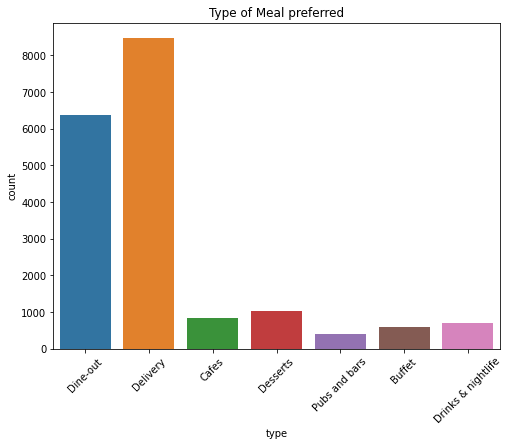

In [38]:
figure = plt.figure(figsize=(8,6))
sns.countplot(x= 'type',data = df1)
plt.title('Type of Meal preferred')

#Rotating the x ticklabels
x= plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(45)
plt.show()

**Observations-** Delivery and Dine-out meals are mostly preferred.

**7. Number of restaurants located in each city.**

In [39]:
df1['city'].value_counts()

BTM                      1132
Koramangala 7th Block    1078
Koramangala 4th Block    1070
Koramangala 5th Block    1011
Koramangala 6th Block     967
Jayanagar                 833
Indiranagar               813
MG Road                   799
Church Street             783
Brigade Road              769
Lavelle Road              716
Residency Road            676
JP Nagar                  665
Old Airport Road          597
HSR                       571
Marathahalli              496
Whitefield                490
Brookefield               485
Basavanagudi              472
Frazer Town               450
Bannerghatta Road         446
Kammanahalli              431
Kalyan Nagar              417
Malleshwaram              398
Bellandur                 393
Sarjapur Road             392
Banashankari              298
Rajajinagar               287
Electronic City           255
New BEL Road              237
Name: city, dtype: int64

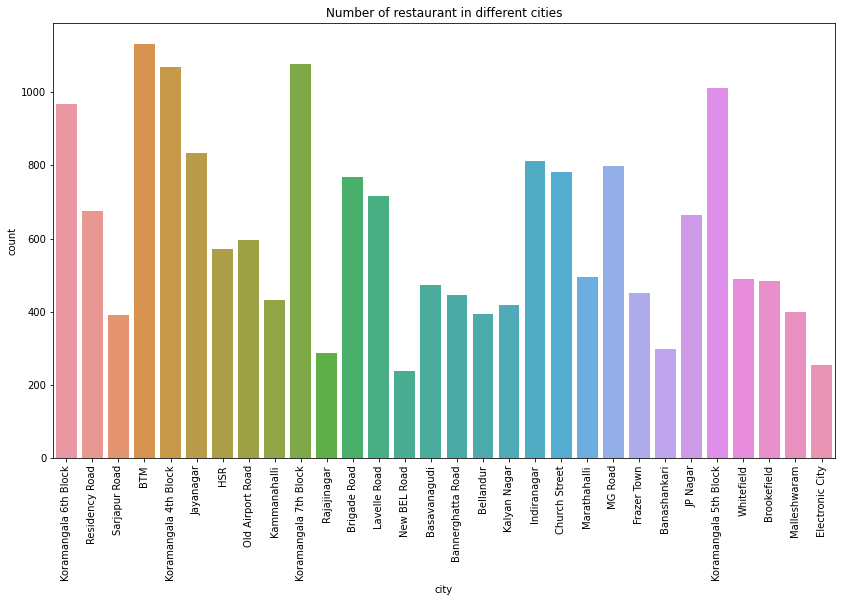

In [40]:
figure = plt.figure(figsize=(14,8))
sns.countplot(x='city', data= df1)
plt.title('Number of restaurant in different cities')

# Rotating the x ticklabels.
x = plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(90)
plt.show()

**Observations-** 1,132 restaurants are situated in BTM, and in Koramangala 7th Block, Koramangala 4th Block, Koramangala 5th Block, Koramangala 6th Block the numbers of restaurants are 1078,1070,1011,967 respectively.<br>
**BTM** is the place where the highest number of restaurants are located.

### **Bivariate Analysis**

**1. Online orders vs Rates**

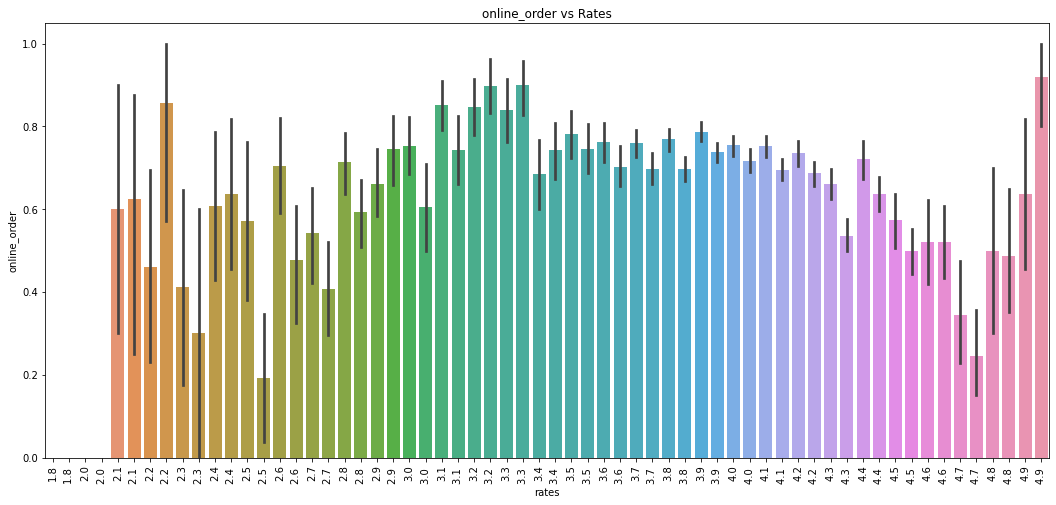

In [41]:
figure = plt.figure(figsize=(18,8))
sns.barplot(x='rates',y='online_order', data= df1)
plt.title('online_order vs Rates')

x= plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(90)
plt.show()

**2. Book table vs rates**

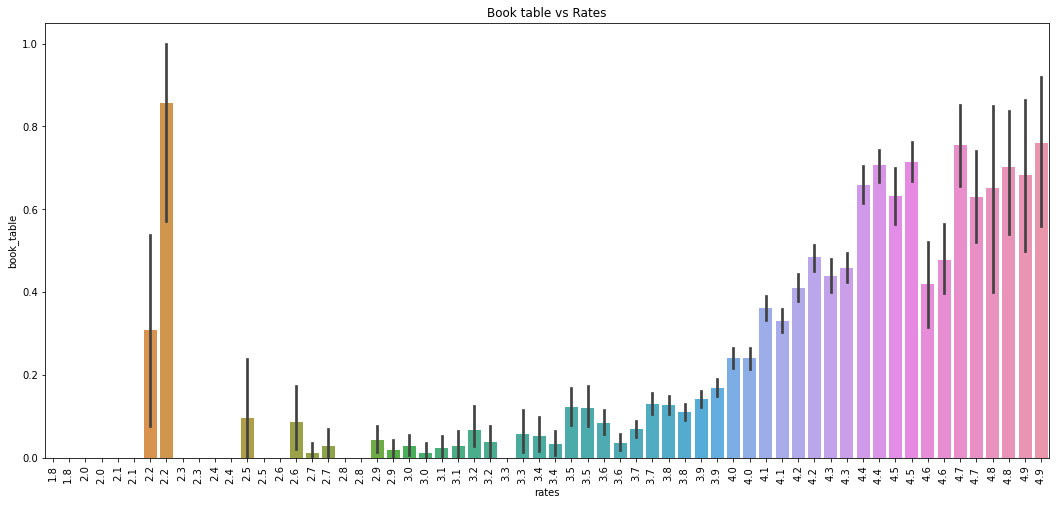

In [42]:
figure = plt.figure(figsize=(18,8))
sns.barplot(x='rates',y='book_table', data= df1)
plt.title('Book table vs Rates')

x= plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(90)
plt.show()

**Observations-** Restaurants which allows table booking mostly have good rating.

**3. Restaurant types vs rating**

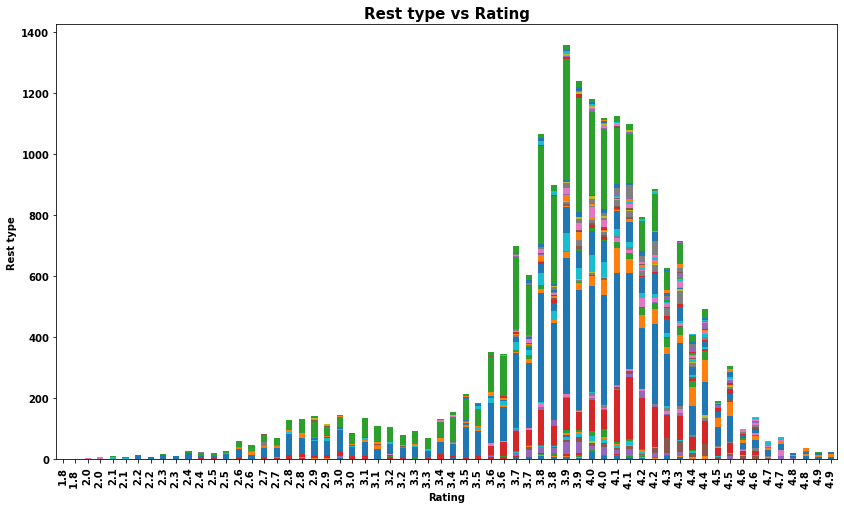

In [43]:
loc_plt=pd.crosstab(df1['rates'],df1['rest_type'])
loc_plt.plot(kind='bar',stacked=True, figsize=(14,8))
plt.title('Rest type vs Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()
plt.show()

**Observations**- Most of the restaurant types having a rating between 3.6 - 4.4

**4. Dish liked vs Rating**

In [0]:
#figure = plt.figure(figsize=(14,8))
#loc_plt=pd.crosstab(df1['rates'],df1['dish_liked'])
#loc_plt.plot(kind='bar',stacked=True)
#plt.title('Dish liked vs Rating',fontsize=15,fontweight='bold')
#plt.ylabel('Dish liked',fontsize=10,fontweight='bold')
#plt.xlabel('Rating',fontsize=10,fontweight='bold')
#plt.xticks(fontsize=10,fontweight='bold')
#plt.yticks(fontsize=10,fontweight='bold')
#plt.legend().remove()
#plt.show()

In [45]:
loc_plt=pd.crosstab(df1['rates'],df1['type'])
loc_plt

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
rates,,,,,,,
1.8,0,0,0,0,2,0,0
1.8,0,0,0,0,2,0,0
2.0,0,0,0,0,1,2,0
2.0,0,0,1,0,4,2,0
2.1,0,0,8,0,2,0,0
...,...,...,...,...,...,...,...
4.7,6,5,15,5,31,6,5
4.8,2,0,6,5,4,1,2
4.8,2,0,9,5,13,4,4


**5. Type of Meal vs Rating**

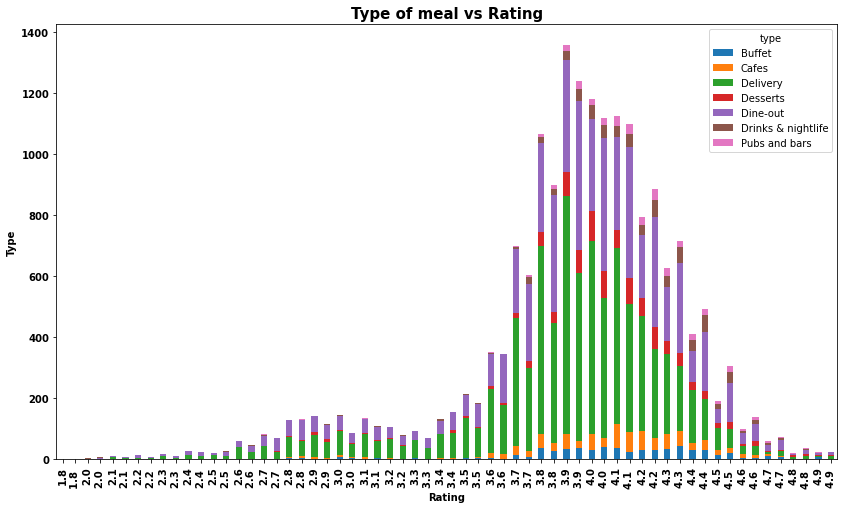

In [46]:
loc_plt=pd.crosstab(df1['rates'],df1['type'])
loc_plt.plot(kind='bar',stacked=True, figsize = (14,8))
plt.title('Type of meal vs Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
#plt.legend().remove()
plt.show()

**Observations**- Most of the types of meal provides rating between 3.8 - 4.3

**6. City vs Rating**

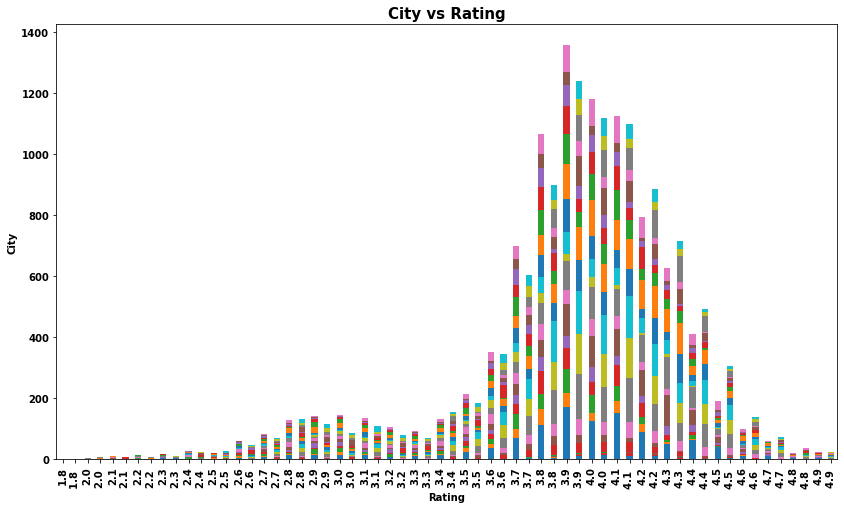

In [50]:
loc_plt=pd.crosstab(df1['rates'],df1['city'])
loc_plt.plot(kind='bar',stacked=True, figsize = (14,8))
plt.title('City vs Rating',fontsize=15,fontweight='bold')
plt.ylabel('City',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()
plt.show()

**7. Cost vs Rating**

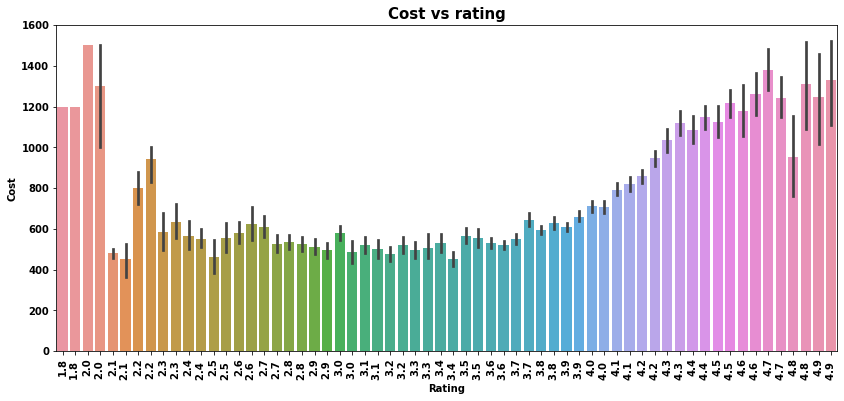

In [48]:
figure = plt.figure(figsize = (14,6))
sns.barplot(x= 'rates', y ='cost', data = df1)
plt.title('Cost vs rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Cost',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

#Rotating x ticklabels
x= plt.gca().xaxis
for item in x.get_ticklabels():
  item.set_rotation(90)
plt.show()


**observations** -1 The restaurants whose rating is 2.0 is the most expensive restaurants.<br>
2 The restaurants with high rating are also expensive have cost around 1000 - 1400

**8. Cost vs Online Order**

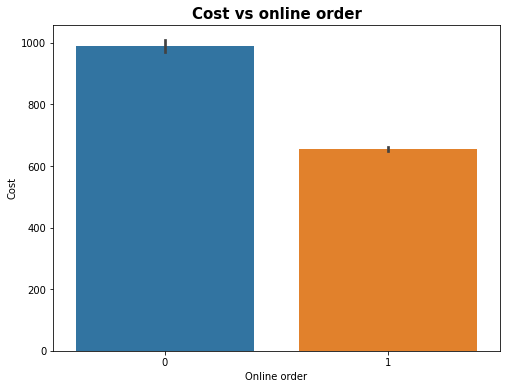

In [49]:
figure = plt.figure(figsize = (8,6))
sns.barplot(x= 'online_order', y ='cost', data = df1)
plt.title('Cost vs online order', fontsize = 15, fontweight = 'bold')
plt.ylabel('Cost',fontsize=10)
plt.xlabel('Online order',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Observations-** The restaurants which does not take online orders are more expensive.

**9. Cost vs Book table**

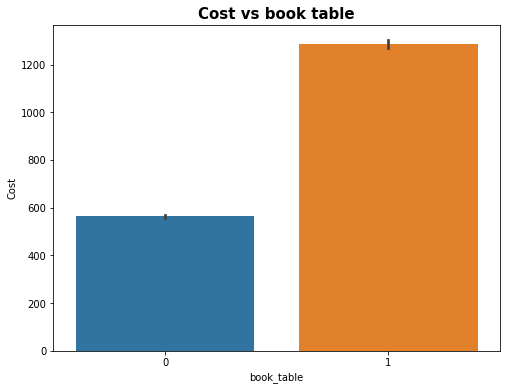

In [51]:
figure = plt.figure(figsize = (8,6))
sns.barplot(x= 'book_table', y ='cost', data = df1)
plt.title('Cost vs book table', fontsize = 15, fontweight = 'bold')
plt.ylabel('Cost',fontsize=10)
plt.xlabel('book_table',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observations-** The restaurants which provides table booking are more expensive.

**10 Type of Meal vs cost**

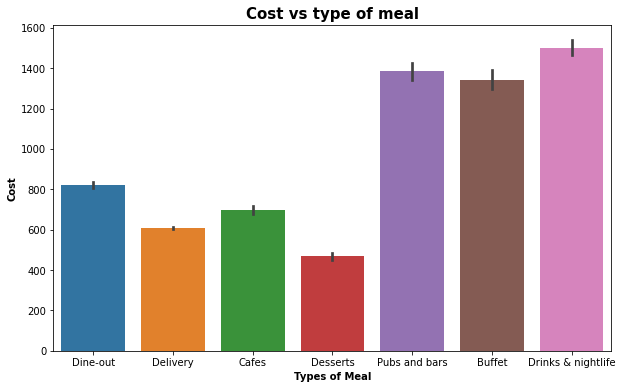

In [52]:
figure = plt.figure(figsize = (10,6))
sns.barplot(x= 'type', y ='cost', data = df1)
plt.title('Cost vs type of meal', fontsize = 15, fontweight = 'bold')
plt.ylabel('Cost',fontsize=10, fontweight = 'bold')
plt.xlabel('Types of Meal',fontsize=10, fontweight ='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observations-** The restaurants which offers types like pubs and bars, Buffet , Drinks & nightlife are more expensive than then other types of meal offerings restaurants.

## **Feature Engineering**

**Remove the columns reviews list and menu_item** because rating does not depend on the menu_item but on dish_liked and menu item has many empty columns.

In [53]:
df1['reviews_list'][1]

'[(\'Rated 5.0\', \'RATED\\n  Really great ambience and experience. Bartender Sujit was really cooperative in serving us all we were looking for. He served us speedy and tasty cocktails alongside Kamikaze shooters, all of which were brilliant in both taste and effect.\'), (\'Rated 5.0\', \'RATED\\n  The place is great, the food here is really nice. The vegetarian too. The girls and I absolutely love the karaoke night and Sujit does a phenomenal job at the bar!\'), (\'Rated 5.0\', \'RATED\\n  Boozy griffin is such an amazing and lively place. Our bartender sujit is amazing guy!Ã\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x83Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82Â¢Ã\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82\\x98Ã\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82ÂºÃ\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x83Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82Â¯Ã\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82Â¸Ã\x83\\x83Ã\x82\\x83Ã\x83\\x8

In [54]:
df1 = df1.drop(columns=['name','reviews_list','menu_item'])
df1.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
1,0,1,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental",1800.0,Dine-out,Koramangala 6th Block,4.6
3,0,0,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos",1500.0,Dine-out,Residency Road,4.3
7,0,1,125,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500.0,Dine-out,Sarjapur Road,3.9
9,1,0,218,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600.0,Delivery,BTM,3.6
11,1,0,169,Quick Bites,"Coffee, Paratha, Chaat, Masala Dosa, Dahipuri,...","North Indian, South Indian",250.0,Delivery,Residency Road,3.8


### One hot encoding

**Creating dummy variables for the categorical type columns.**

In [55]:
# Creating dummy variables.
df_dummy_rest_type = pd.get_dummies(df1['rest_type'])
df_dummy_dish_liked = pd.get_dummies(df1['dish_liked'])
df_dummy_cuisines = pd.get_dummies(df1['cuisines'])
df_dummy_type = pd.get_dummies(df1['type'])
df_dummy_city = pd.get_dummies(df1['city']) 

# Now combine all the dummy variables
new_df = pd.concat([df1, df_dummy_rest_type, df_dummy_dish_liked, df_dummy_cuisines, df_dummy_type, df_dummy_city], axis =1)

# Remove the columns whose dummies are created.
new_df = new_df.drop(columns = ['rest_type','dish_liked','cuisines','city','type'])
new_df.head()

,online_order,book_table,votes,cost,rates,Bakery,"Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Quick Bites",Bar,"Bar, Casual Dining","Bar, Lounge","Bar, Pub","Bar, Quick Bites",Beverage Shop,"Beverage Shop, Cafe","Beverage Shop, Dessert Parlor","Beverage Shop, Quick Bites",Cafe,"Cafe, Bakery","Cafe, Bar","Cafe, Casual Dining","Cafe, Dessert Parlor","Cafe, Lounge","Cafe, Quick Bites",Casual Dining,"Casual Dining, Bar","Casual Dining, Cafe","Casual Dining, Irani Cafee","Casual Dining, Lounge","Casual Dining, Microbrewery","Casual Dining, Pub",Club,"Club, Casual Dining",Delivery,Dessert Parlor,"Dessert Parlor, Bakery","Dessert Parlor, Beverage Shop","Dessert Parlor, Cafe","Dessert Parlor, Kiosk",...,Vietnamese,"Vietnamese, Salad","Vietnamese, Thai, Burmese, Japanese",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,HSR,Indiranagar,JP Nagar,Jayanagar,Kalyan Nagar,Kammanahalli,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
1,0,1,5015,1800.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,699,1500.0,4.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,1,125,2500.0,3.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,218,600.0,3.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,169,250.0,3.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Feature Scaling**<br>
**Now we Standardize our data**

In [56]:
from sklearn.preprocessing import StandardScaler
#X= new_df.drop(columns=['rates'])
X = new_df.copy()

# Creating Scaler objects
scaler = StandardScaler()
df_fit = scaler.fit_transform(X)

X= pd.DataFrame(df_fit, columns=X.columns)
X.head()

,online_order,book_table,votes,cost,rates,Bakery,"Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Quick Bites",Bar,"Bar, Casual Dining","Bar, Lounge","Bar, Pub","Bar, Quick Bites",Beverage Shop,"Beverage Shop, Cafe","Beverage Shop, Dessert Parlor","Beverage Shop, Quick Bites",Cafe,"Cafe, Bakery","Cafe, Bar","Cafe, Casual Dining","Cafe, Dessert Parlor","Cafe, Lounge","Cafe, Quick Bites",Casual Dining,"Casual Dining, Bar","Casual Dining, Cafe","Casual Dining, Irani Cafee","Casual Dining, Lounge","Casual Dining, Microbrewery","Casual Dining, Pub",Club,"Club, Casual Dining",Delivery,Dessert Parlor,"Dessert Parlor, Bakery","Dessert Parlor, Beverage Shop","Dessert Parlor, Cafe","Dessert Parlor, Kiosk",...,Vietnamese,"Vietnamese, Salad","Vietnamese, Thai, Burmese, Japanese",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,HSR,Indiranagar,JP Nagar,Jayanagar,Kalyan Nagar,Kammanahalli,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,-1.548931,1.679951,3.932166,2.006077,1.629413,-0.081639,-0.054213,-0.051105,-0.064778,-0.127112,-0.12263,-0.016475,-0.016475,-0.019494,-0.077848,-0.025527,-0.044243,-0.076424,-0.333062,-0.076064,-0.025527,-0.083636,-0.065199,-0.02444,-0.039011,-0.684999,-0.208544,-0.113165,-0.02444,-0.020841,-0.044243,13.965383,-0.036858,-0.014735,-0.172588,-0.220177,-0.030388,-0.046642,-0.076424,-0.010419,...,-0.03127,-0.010419,-0.012761,-0.183774,-0.217043,-0.922412,-0.244446,1.375783,-0.199158,-0.151415,-0.255837,-0.12821,-0.157493,-0.162136,-0.147622,-0.208686,-0.164413,-0.21066,-0.118459,-0.158215,-0.178824,-0.214841,-0.193493,-0.217591,-0.152164,-0.154757,-0.248287,-0.240936,4.249217,-0.249271,-0.201064,-0.212898,-0.148578,-0.166318,-0.114145,-0.182983,-0.125783,-0.195147,-0.147430,-0.165281
1,-1.548931,-0.595255,0.083217,1.431523,0.926093,-0.081639,-0.054213,-0.051105,-0.064778,-0.127112,-0.12263,-0.016475,-0.016475,-0.019494,-0.077848,-0.025527,-0.044243,-0.076424,-0.333062,-0.076064,-0.025527,-0.083636,-0.065199,-0.02444,-0.039011,1.459856,-0.208544,-0.113165,-0.02444,-0.020841,-0.044243,-0.071606,-0.036858,-0.014735,-0.172588,-0.220177,-0.030388,-0.046642,-0.076424,-0.010419,...,-0.03127,-0.010419,-0.012761,-0.183774,-0.217043,-0.922412,-0.244446,1.375783,-0.199158,-0.151415,-0.255837,-0.12821,-0.157493,-0.162136,-0.147622,-0.208686,-0.164413,-0.21066,-0.118459,-0.158215,-0.178824,-0.214841,-0.193493,-0.217591,-0.152164,-0.154757,-0.248287,-0.240936,-0.235337,-0.249271,-0.201064,-0.212898,-0.148578,-0.166318,-0.114145,-0.182983,-0.125783,5.124341,-0.147430,-0.165281
2,-1.548931,1.679951,-0.428668,3.346704,-0.011667,-0.081639,-0.054213,-0.051105,-0.064778,-0.127112,-0.12263,-0.016475,-0.016475,-0.019494,-0.077848,-0.025527,-0.044243,-0.076424,-0.333062,-0.076064,-0.025527,-0.083636,-0.065199,-0.02444,-0.039011,-0.684999,-0.208544,-0.113165,-0.02444,-0.020841,-0.044243,-0.071606,-0.036858,-0.014735,-0.172588,-0.220177,-0.030388,-0.046642,-0.076424,-0.010419,...,-0.03127,-0.010419,-0.012761,-0.183774,-0.217043,-0.922412,-0.244446,1.375783,-0.199158,-0.151415,-0.255837,-0.12821,-0.157493,-0.162136,-0.147622,-0.208686,-0.164413,-0.21066,-0.118459,-0.158215,-0.178824,-0.214841,-0.193493,-0.217591,-0.152164,-0.154757,-0.248287,-0.240936,-0.235337,-0.249271,-0.201064,-0.212898,-0.148578,-0.166318,-0.114145,-0.182983,-0.125783,-0.195147,6.782894,-0.165281
3,0.645606,-0.595255,-0.345732,-0.292140,-0.714987,-0.081639,-0.054213,-0.051105,-0.064778,-0.127112,-0.12263,-0.016475,-0.016475,-0.019494,-0.077848,-0.025527,-0.044243,-0.076424,-0.333062,-0.076064,-0.025527,-0.083636,-0.065199,-0.02444,-0.039011,1.459856,-0.208544,-0.113165,-0.02444,-0.020841,-0.044243,-0.071606,-0.036858,-0.014735,-0.172588,-0.220177,-0.03

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18427 entries, 0 to 18426
Columns: 6667 entries, online_order to Whitefield
dtypes: float64(6667)
memory usage: 937.3 MB


**Converting the type of rates column**<br>
Rates column is our targeted variable.

In [58]:
Y = new_df['rates']
Y = Y.astype(float)
Y

1        4.6
3        4.3
7        3.9
9        3.6
11       3.8
        ... 
41350    3.7
41357    3.7
41359    4.0
41360    3.9
41368    3.8
Name: rates, Length: 18427, dtype: float64

## **Model Building**

### **Train test split**<br>
Split the data into train and test data. Using the **train_test_split** method.


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05, random_state = 0)
print(X_train)
print('*'*50)
print(X_test)
print('*'*50)
print(y_train)
print('*'*50)
print(y_test)



       online_order  book_table  ...  Sarjapur Road  Whitefield
7750      -1.548931   -0.595255  ...       -0.14743   -0.165281
13967     -1.548931    1.679951  ...       -0.14743   -0.165281
9002       0.645606    1.679951  ...       -0.14743   -0.165281
13250      0.645606    1.679951  ...       -0.14743   -0.165281
5116       0.645606   -0.595255  ...       -0.14743   -0.165281
...             ...         ...  ...            ...         ...
9225       0.645606   -0.595255  ...       -0.14743   -0.165281
13123     -1.548931   -0.595255  ...       -0.14743   -0.165281
9845      -1.548931   -0.595255  ...       -0.14743   -0.165281
10799      0.645606    1.679951  ...       -0.14743   -0.165281
2732       0.645606   -0.595255  ...       -0.14743   -0.165281

[17505 rows x 6667 columns]
**************************************************
       online_order  book_table  ...  Sarjapur Road  Whitefield
3256       0.645606   -0.595255  ...       -0.14743   -0.165281
2984      -1.548931   -0

## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('Linear Regression coefficients of Linear model: {}'.format(lr.coef_))
print('Linear Regression intercept of Linear model: {}'.format(lr.intercept_))

print('R-Squared score on training data: {:.3f}'.format(lr.score(X_train,y_train)))
print('R-Squared score on test data: {:.3f}'.format(lr.score(X_test,y_test)))

print('r2_score : {:.3f}'.format(r2_score(y_test,y_pred)))



Linear Regression coefficients of Linear model: [ 1.72769900e-15  5.20417043e-17 -2.19269047e-15 ... -1.65025496e-03
 -1.26668140e-03 -1.41233991e-03]
Linear Regression intercept of Linear model: 3.9054523669367858
R-Squared score on training data: 1.000
R-Squared score on test data: 0.884
r2_score : 0.884


### Visualization of Linear Regression Model

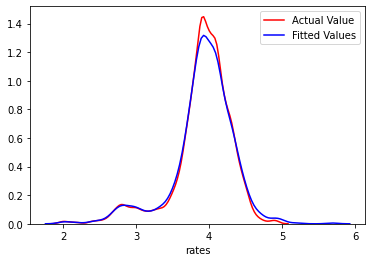

In [0]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

## Ridge Regression

In [0]:
from sklearn.linear_model import Ridge

for this_alpha in [0.001,0.01,0.1,1.0,10.0,100.0]:
  RR = Ridge(alpha = this_alpha)
  RR.fit(X_train, y_train)

  y_pred_RR = RR.predict(X_test)

  print('For alpha : {}'.format(this_alpha))

  print('Ridge Regression coefficients of Linear model: {}'.format(RR.coef_))
  print('Ridge Regression intercept of Linear model: {}'.format(RR.intercept_))

  print('R-Squared score on training data: {:.3f}'.format(RR.score(X_train,y_train)))
  print('R-Squared score on test data: {:.3f}'.format(RR.score(X_test,y_test)))

  print('r2_score : {:.3f}'.format(r2_score(y_test,y_pred_RR)))
  print('*'*50)


For alpha : 0.001
Ridge Regression coefficients of Linear model: [ 1.99095803e-07  6.99149627e-08  5.34304945e-07 ...  1.83584202e-08
  1.41346969e-09 -1.66254397e-08]
Ridge Regression intercept of Linear model: 3.904976391659445
R-Squared score on training data: 1.000
R-Squared score on test data: 1.000
r2_score : 1.000
**************************************************
For alpha : 0.01
Ridge Regression coefficients of Linear model: [ 1.99091929e-06  7.01027046e-07  5.32985108e-06 ...  1.85596240e-07
  1.56254487e-08 -1.64630102e-07]
Ridge Regression intercept of Linear model: 3.904976376636914
R-Squared score on training data: 1.000
R-Squared score on test data: 1.000
r2_score : 1.000
**************************************************
For alpha : 0.1
Ridge Regression coefficients of Linear model: [ 1.99044506e-05  7.19687562e-06  5.21004675e-05 ...  1.85937065e-06
  1.53579593e-07 -1.65286821e-06]
Ridge Regression intercept of Linear model: 3.9049762268881776
R-Squared score on train

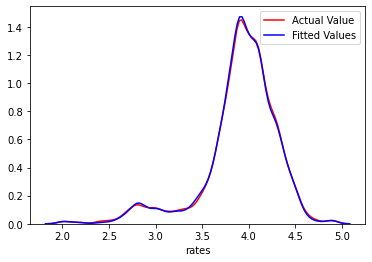

In [0]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_RR, hist=False, color="b", label="Fitted Values" , ax=ax1)

## Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

print('R-Squared score on training data: {:.3f}'.format(rf_reg.score(X_train,y_train)))
print('R-Squared score on test data: {:.3f}'.format(rf_reg.score(X_test,y_test)))

print('r2_score : {:.3f}'.format(r2_score(y_test,y_pred_rf)))
print('*'*50)



R-Squared score on training data: 1.000
R-Squared score on test data: 1.000
r2_score : 1.000
**************************************************


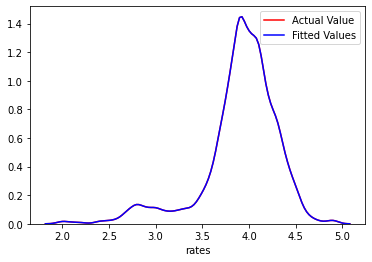

In [0]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax1)

## **Model Selection and Evaluation**

In [0]:
score = pd.DataFrame({'Training Score': [lr.score(X_train,y_train), RR.score(X_train,y_train), rf_reg.score(X_train,y_train)], 
                      'Test Score':[lr.score(X_test,y_test), RR.score(X_test,y_test), rf_reg.score(X_test,y_test)]}, 
                     index = ['Linear Regression','Ridge Regression','Random Forest Regressor'])
score

,Training Score,Test Score
Linear Regression,1.000000,0.883674
Ridge Regression,0.999226,0.993930
Random Forest Regressor,1.000000,1.000000


**Observation-** From the above DataFrame it is very clear that the training score and test score for Random forest regressor model is 100%. Random Forest model does not show any error.<br>
* Random Forest Regressor model is the best fit for this data.

## **Random Forest Regressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

print('R-Squared score on training data: {:.3f}'.format(rf_reg.score(X_train,y_train)))
print('R-Squared score on test data: {:.3f}'.format(rf_reg.score(X_test,y_test)))

print('r2_score : {:.3f}'.format(r2_score(y_test,y_pred_rf)))
print('*'*50)


R-Squared score on training data: 1.000
R-Squared score on test data: 1.000
r2_score : 1.000
**************************************************


Let us find **Root Mean Squared Error** on Random Forest Regressor Model.<br>
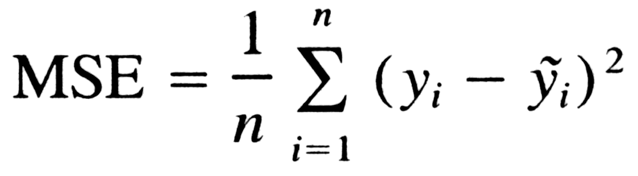

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred_rf)
print('Mean Squared Error:{:.3f} '.format(mse))
print('Root mean squared Error:{:.3f} '.format(np.sqrt(mse)))

Mean Squared Error:0.000 
Root mean squared Error:0.000 


**Observation-** Root mean squared error value equal to zero show that the model is best fit for the data. i.e better generalisation.

# ***Thank You!***